In [1]:
from astropy.time import Time
from datetime import timedelta
from lsst_efd_client import EfdClient
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

In [3]:
start = Time('2020-03-06T13:41:30') #this is UTC
end = start+ timedelta(minutes = 5)
#end = Time('2020-02-01T01:00:00')

In [4]:
end.tai

<Time object: scale='tai' format='isot' value=2020-03-06T13:47:07.000>

In [5]:
df = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', start.tai, end.tai, csc_index)
df.head()

,axialForceMeasured0,axialForceMeasured1,axialForceMeasured10,axialForceMeasured11,axialForceMeasured12,axialForceMeasured13,axialForceMeasured14,axialForceMeasured15,axialForceMeasured16,axialForceMeasured17,...,axialForceMeasured71,axialForceMeasured8,axialForceMeasured9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-06 13:42:07.035000+00:00,186.338501,187.434341,188.646881,191.358124,187.333206,188.996811,187.668457,189.927292,190.476288,185.345657,...,251.735168,182.434357,182.764999,1,1.583502e+09,94205,1.583502e+09,f6f121a3,569373,1.583502e+09
2020-03-06 13:42:07.086000+00:00,186.137238,187.368271,188.682526,191.616333,187.465851,188.986664,187.617905,190.135834,190.689804,185.178802,...,251.725113,182.500626,182.988403,1,1.583502e+09,94205,1.583502e+09,f6f121a3,569382,1.583502e+09
2020-03-06 13:42:07.136000+00:00,186.137238,187.342865,188.692719,191.621384,187.491364,188.981598,187.643188,190.090057,190.801651,185.173752,...,251.750259,182.541397,183.120407,1,1.583502e+09,94205,1.583502e+09,f6f121a3,569392,1.583502e+09
2020-03-06 13:42:07.185000+00:00,186.263031,187.286972,188.921890,191.737823,187.476059,188.930878,187.481415,190.059540,190.766052,184.936111,...,251.815643,182.714722,183.287949,1,1.583502e+09,94205,1.583502e+09,f6f121a3,569403,1.583502e+09
2020-03-06 13:42:07.237000+00:00,186.388809,187.444504,189.069595,191.834015,187.241379,188.925812,187.461197,189.983246,190.786392,185.057465,...,251.644638,182.801392,183.485947,1,1.583502e+09,94205,1.583502e+09,f6f121a3,569412,1.583502e+09


In [6]:
len(df)

6000

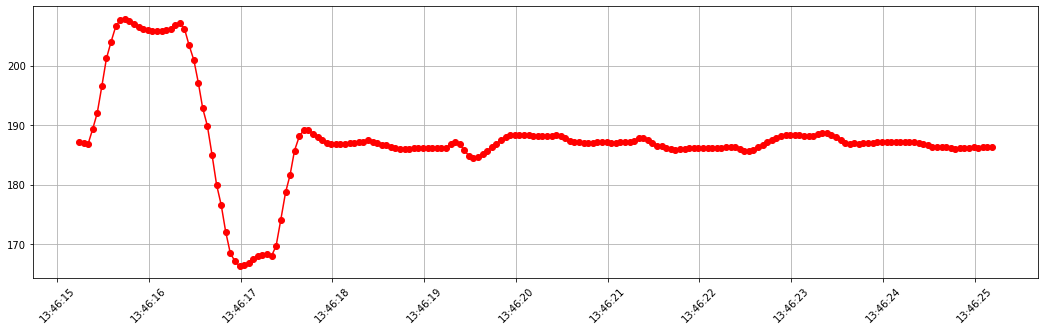

In [7]:
ti = 10 # 1 second
ni = ti*20
aa =np.array(df['axialForceMeasured0'])
si = np.where(aa==max(aa))[0][0]-10
fig, ax = plt.subplots(1,1, figsize=(18,5))
plt.plot(pd.to_datetime(df['private_sndStamp'][si:si+ni], unit='s'), df['axialForceMeasured0'][si:si+ni],'-ro')
plt.xticks(rotation=45);
plt.grid()

507